# Functions for plotting for all datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 55
pd.set_option('display.max_rows', 999)

In [3]:
import os
data = os.listdir('../data')

In [4]:
new_list = []

for strg in data:
    if not strg.find('10^4') == -1:
        new_list.append(strg)
new_list

['10^4']

In [5]:
# For algorithm wise graphs

df_insertion = pd.read_pickle(r"..\data\10^4\insertion_sort_n10^4.pkl")
df_bubble = pd.read_pickle(r"..\data\10^4\bubble_sort_n10^4.pkl")
df_merge = pd.read_pickle(r"..\data\10^6\merge_sort_n10^6.pkl")
df_quick = pd.read_pickle(r"..\data\10^6\quick_sort_n10^6.pkl")
df_combined = pd.read_pickle(r"..\data\10^6\combined_sort_n10^6.pkl")
df_python_sort = pd.read_pickle(r"..\data\10^8\sorted_n10^8.pkl")
df_np_sort = pd.read_pickle(r"..\data\10^8\sort_n10^8.pkl")

In [61]:
# # For combined graphs

# # data_order = '10^8'
# # data_order = '10^6'
# data_order = '10^4'
# # data_order = '10^3'
# # data_order = '2^16'

# df_insertion = pd.read_pickle(r"..\data\\" + data_order +"\insertion_sort_n" + data_order + ".pkl")
# df_bubble = pd.read_pickle(r"..\data\\" + data_order +"\\bubble_sort_n" + data_order + ".pkl")
# df_merge = pd.read_pickle(r"..\data\\" + data_order +"\merge_sort_n" + data_order  + ".pkl")
# df_quick = pd.read_pickle(r"..\data\\" + data_order +"\quick_sort_n" + data_order  + ".pkl")
# df_combined = pd.read_pickle(r"..\data\\" + data_order +"\combined_sort_n" + data_order  + ".pkl")
# df_python_sort = pd.read_pickle(r"..\data\\" + data_order +"\sorted_n" + data_order  + ".pkl")
# df_np_sort = pd.read_pickle(r"..\data\\" + data_order +"\sort_n" + data_order  + ".pkl")

In [8]:
frames = [df_insertion, df_bubble, df_merge, df_quick, df_combined, df_python_sort, df_np_sort]

# Concatenating all benchmarking dataframes into one
df_all_frames = pd.concat(frames, axis=0, ignore_index=True)

In [9]:
df_all_frames.shape

(705, 5)

In [10]:
# Renaimg a couple of column titles to nice names for title in Plots
df_all_frames.rename(columns= {'sorting algorithm' : 'Sorting Algorithm', 'time': 'Time' }, inplace= True)
df_all_frames.head(1)

,input order,input size,run number,Sorting Algorithm,Time
0,sorted,1,1,insertion_sort,5.508552e-07


In [11]:
# Replacing Algorithm names to nice names for Legend in Plots

sorting_algorithm = {
    'Insertion Sort': 'insertion_sort',
    'Bubble Sort': 'bubble_sort',
    'Merge Sort': 'merge_sort',
    'Quick Sort': 'quick_sort',
    'Combined Sort': 'combined_sort',
    'Python Built-in Sort': 'sorted',
    'NumPy Sort': 'sort'
}
input_ordering = {
    'Sorted Data': 'sorted',
    'Reverse Sorted Data': 'reversed',
    'Random Data': 'random',
#     'Identical Data': 'identical'
}

for title, listed in sorting_algorithm.items():
    df_all_frames['Sorting Algorithm'] = df_all_frames[
        'Sorting Algorithm'].str.replace(listed, title)

for title, listed in input_ordering.items():
    df_all_frames['input order'] = df_all_frames['input order'].str.replace(
        listed, title)

df_all_frames.head(1)

,input order,input size,run number,Sorting Algorithm,Time
0,Sorted Data,1,1,Insertion Sort,5.508552e-07


In [12]:
np.min(df_all_frames['Time'].values)

5.215665999999999e-07

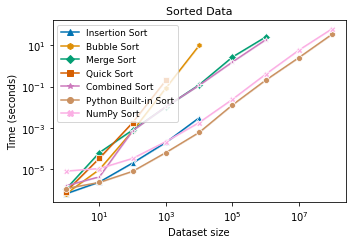

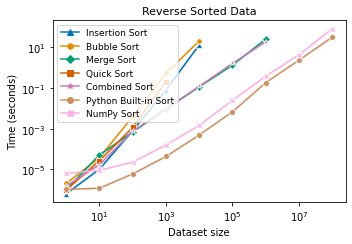

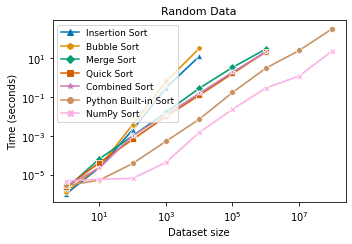

In [57]:
# Plot Categories
input_ordering = {
    'Sorted Data': 'sorted',
    'Reverse Sorted Data': 'reversed',
    'Random Data': 'random',
    #     'Identical Data': 'identical'
}

labels_size = '9'
title_size = '11'
legend_size = '7'

for title, order in input_ordering.items():
    df_order_temp = df_all_frames[df_all_frames['input order'] == title]
    plt.figure(figsize=(5, 3.5))
#     plt.figure()

    # Using Colorblind palette for colors being used in plots
    sns.set_palette(sns.color_palette('colorblind'))
    fig = sns.lineplot(
        x='input size',
        y='Time',
        hue='Sorting Algorithm',
        style='Sorting Algorithm',
        markers=['^', 'h', 'D', 's', '*', 'o', 'X'],
        dashes=False,
        data=df_order_temp, ci=0
        #                        , linewidth=1
        #                        , alpha = 0.7
    )
    plt.title(title, fontsize=title_size)
    plt.xlabel('Dataset size')
    plt.ylabel('Time (seconds)')
    plt.legend(loc=2, fontsize = 9)
    plt.grid(False)
    plt.xscale('log')
    plt.yscale('log')
    plt.tight_layout()
    fig = fig.get_figure()
    fig.savefig('plots/' + title + '.pdf')
    plt.show()

## Insertion Sort

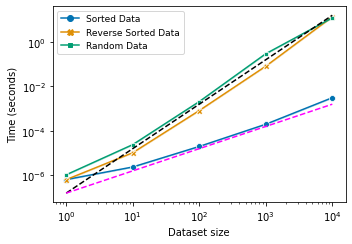

In [38]:
# Plot Categories
sorting_algorithm = {
    'Insertion Sort': 'insertion_sort',
#     'Bubble Sort': 'bubble_sort',
#     'Merge Sort': 'merge_sort',
#     'Quick Sort': 'quick_sort',
#     'Combined Sort': 'combined_sort',
#     'Python Built-in Sort': 'sorted',
#     'NumPy Sort': 'sort'
}
x = [10**0,10**1, 10**2, 10**3, 10**4]
# labels_size = '9'
# title_size = '11'
# legend_size = '7'

for title, sort_func in sorting_algorithm.items():
    df_order_temp = df_all_frames[df_all_frames['Sorting Algorithm'] == title]
    plt.figure(figsize=(5, 3.5))

    # Using Colorblind palette for colors being used in plots
    sns.set_palette(sns.color_palette('colorblind'))
    fig = sns.lineplot(x='input size',
                       y='Time',
                       hue='input order',
                       style='input order',
                       markers=True,
                       dashes=False,
                       data=df_order_temp,ci=0)
#     plt.title(title)

    plt.xlabel('Dataset size')
    plt.ylabel('Time (seconds)')
    plt.legend(loc=2, fontsize = 9)
    plt.grid(False)
    plt.xscale('log')
    plt.yscale('log')

    plt.loglog(x, [10**-6.8*n**2 for n in x], '--', color='black')
    plt.loglog(x, [10**-6.8*n for n in x], '--', color='magenta')
    #plt.loglog(x[1:], [10**-6.4*n*np.log(n) for n in x[1:]], '--', color='purple')
    
    plt.tight_layout()
    fig = fig.get_figure()
    fig.savefig('plots/' + title + '.pdf')
    plt.show()

## Bubble Sort

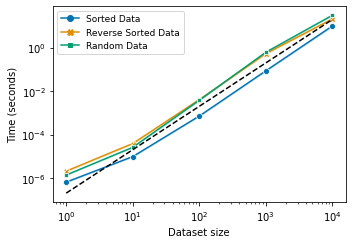

In [39]:
# Plot Categories
sorting_algorithm = {
#     'Insertion Sort': 'insertion_sort',
    'Bubble Sort': 'bubble_sort',
#     'Merge Sort': 'merge_sort',
#     'Quick Sort': 'quick_sort',
#     'Combined Sort': 'combined_sort',
#     'Python Built-in Sort': 'sorted',
#     'NumPy Sort': 'sort'
}
x = [10**0,10**1, 10**2, 10**3, 10**4]
# labels_size = '9'
# title_size = '11'
# legend_size = '7'

for title, sort_func in sorting_algorithm.items():
    df_order_temp = df_all_frames[df_all_frames['Sorting Algorithm'] == title]
    plt.figure(figsize=(5, 3.5))

    # Using Colorblind palette for colors being used in plots
    sns.set_palette(sns.color_palette('colorblind'))
    fig = sns.lineplot(x='input size',
                       y='Time',
                       hue='input order',
                       style='input order',
                       markers=True,
                       dashes=False,
                       data=df_order_temp,ci=0)
#     plt.title(title)

    plt.xlabel('Dataset size')
    plt.ylabel('Time (seconds)')
    plt.legend(loc=2, fontsize = 9)
    plt.grid(False)
    plt.xscale('log')
    plt.yscale('log')

    plt.loglog(x, [10**-6.7*n**2 for n in x], '--', color='black')
    #plt.loglog(x, [10**-6.3*n for n in x], '--', color='magenta')
    #plt.loglog(x[1:], [10**-6.45*n*np.log(n) for n in x[1:]], '--', color='purple')

    plt.tight_layout()
    fig = fig.get_figure()
    fig.savefig('plots/' + title + '.pdf')
    plt.show()

## Merge Sort

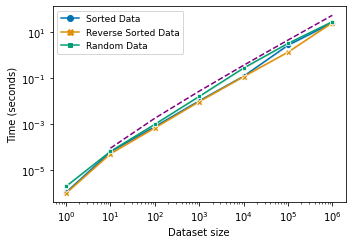

In [24]:
# Plot Categories
sorting_algorithm = {
#     'Insertion Sort': 'insertion_sort',
#     'Bubble Sort': 'bubble_sort',
    'Merge Sort': 'merge_sort',
#     'Quick Sort': 'quick_sort',
#     'Combined Sort': 'combined_sort',
#     'Python Built-in Sort': 'sorted',
#     'NumPy Sort': 'sort'
}
x = [10**0,10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
# labels_size = '9'
# title_size = '11'
# legend_size = '7'

for title, sort_func in sorting_algorithm.items():
    df_order_temp = df_all_frames[df_all_frames['Sorting Algorithm'] == title]
    plt.figure(figsize=(5, 3.5))

    # Using Colorblind palette for colors being used in plots
    sns.set_palette(sns.color_palette('colorblind'))
    fig = sns.lineplot(x='input size',
                       y='Time',
                       hue='input order',
                       style='input order',
                       markers=True,
                       dashes=False,
                       data=df_order_temp,ci=0)
#     plt.title(title)

    plt.xlabel('Dataset size')
    plt.ylabel('Time (seconds)')
    plt.legend(loc=2, fontsize = 9)
    plt.grid(False)
    plt.xscale('log')
    plt.yscale('log')

#     plt.loglog(x, [10**-6*n**2 for n in x], '--', color='black')
    #plt.loglog(x, [10**-4.4*n for n in x], '--', color='magenta')
    plt.loglog(x[1:], [10**-5.4*n*np.log(n) for n in x[1:]], '--', color='purple')
    
    plt.tight_layout()
    fig = fig.get_figure()
    fig.savefig('plots/' + title + '.pdf')
    plt.show()

## Quick Sort

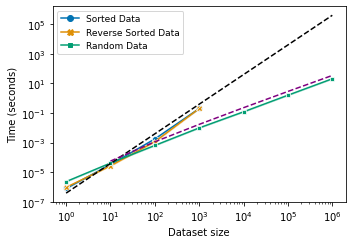

In [45]:
# Plot Categories
sorting_algorithm = {
#     'Insertion Sort': 'insertion_sort',
#     'Bubble Sort': 'bubble_sort',
#     'Merge Sort': 'merge_sort',
    'Quick Sort': 'quick_sort',
#     'Combined Sort': 'combined_sort',
#     'Python Built-in Sort': 'sorted',
#     'NumPy Sort': 'sort'
}
x = [10**0,10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
# labels_size = '9'
# title_size = '11'
# legend_size = '7'

for title, sort_func in sorting_algorithm.items():
    df_order_temp = df_all_frames[df_all_frames['Sorting Algorithm'] == title]
    #df_order_temp = df_order_temp[df_order_temp['input order'] == 'Random Data']
    plt.figure(figsize=(5, 3.5))

    # Using Colorblind palette for colors being used in plots
    sns.set_palette(sns.color_palette('colorblind'))
    fig = sns.lineplot(x='input size',
                       y='Time',
                       hue='input order',
                       style='input order',
                       markers=True,
                       dashes=False,
                       data=df_order_temp,ci=0)
#     plt.title(title)

    plt.xlabel('Dataset size')
    plt.ylabel('Time (seconds)')
    plt.legend(loc=2, fontsize = 9)
    plt.grid(False)
    plt.xscale('log')
    plt.yscale('log')

    plt.loglog(x, [10**-6.4*n**2 for n in x], '--', color='black')
    #plt.loglog(x, [10**-5.7*n for n in x], '--', color='magenta')
    plt.loglog(x[1:], [10**-5.6*n*np.log(n) for n in x[1:]], '--', color='purple')

    
    plt.tight_layout()
    fig = fig.get_figure()
    fig.savefig('plots/' + title + '.pdf')
    plt.show()

## Combined Sort

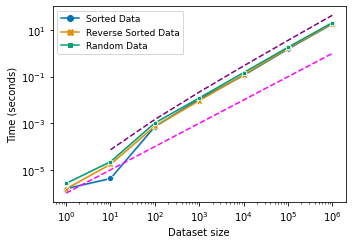

In [33]:
# Plot Categories
sorting_algorithm = {
#     'Insertion Sort': 'insertion_sort',
#     'Bubble Sort': 'bubble_sort',
#     'Merge Sort': 'merge_sort',
#     'Quick Sort': 'quick_sort',
    'Combined Sort': 'combined_sort',
#     'Python Built-in Sort': 'sorted',
#     'NumPy Sort': 'sort'
}
x = [10**0,10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
# labels_size = '9'
# title_size = '11'
# legend_size = '7'

for title, sort_func in sorting_algorithm.items():
    df_order_temp = df_all_frames[df_all_frames['Sorting Algorithm'] == title]
    plt.figure(figsize=(5, 3.5))

    # Using Colorblind palette for colors being used in plots
    sns.set_palette(sns.color_palette('colorblind'))
    fig = sns.lineplot(x='input size',
                       y='Time',
                       hue='input order',
                       style='input order',
                       markers=True,
                       dashes=False,
                       data=df_order_temp,ci=0)
#     plt.title(title)

    plt.xlabel('Dataset size')
    plt.ylabel('Time (seconds)')
    plt.legend(loc=2, fontsize = 9)
    plt.grid(False)
    plt.xscale('log')
    plt.yscale('log')

#     plt.loglog(x, [10**-5.8*n**2 for n in x], '--', color='black')
    plt.loglog(x, [10**-6*n for n in x], '--', color='magenta')
    plt.loglog(x[1:], [10**-5.5*n*np.log(n) for n in x[1:]], '--', color='purple')
    
    plt.tight_layout()
    fig = fig.get_figure()
    fig.savefig('plots/' + title + '.pdf')
    plt.show()

## Python Built-in Sort

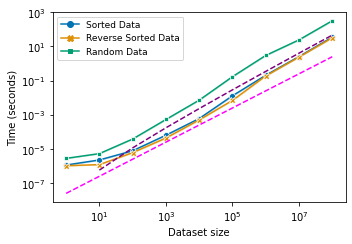

In [47]:
# Plot Categories
sorting_algorithm = {
#     'Insertion Sort': 'insertion_sort',
#     'Bubble Sort': 'bubble_sort',
#     'Merge Sort': 'merge_sort',
#     'Quick Sort': 'quick_sort',
#     'Combined Sort': 'combined_sort',
    'Python Built-in Sort': 'sorted',
#     'NumPy Sort': 'sort'
}
x = [10**0,10**1, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8]
# labels_size = '9'
# title_size = '11'
# legend_size = '7'

for title, sort_func in sorting_algorithm.items():
    df_order_temp = df_all_frames[df_all_frames['Sorting Algorithm'] == title]
    plt.figure(figsize=(5, 3.5))

    # Using Colorblind palette for colors being used in plots
    sns.set_palette(sns.color_palette('colorblind'))
    fig = sns.lineplot(x='input size',
                       y='Time',
                       hue='input order',
                       style='input order',
                       markers=True,
                       dashes=False,
                       data=df_order_temp,ci=0)
#     plt.title(title)

    plt.xlabel('Dataset size')
    plt.ylabel('Time (seconds)')
    plt.legend(loc=2, fontsize = 9)
    plt.grid(False)
    plt.xscale('log')
    plt.yscale('log')

#     plt.loglog(x, [10**-5.6*n**2 for n in x], '--', color='black')
    plt.loglog(x, [10**-7.6*n for n in x], '--', color='magenta')
    plt.loglog(x[1:], [10**-7.6*n*np.log(n) for n in x[1:]], '--', color='purple')
    
    plt.tight_layout()
    fig = fig.get_figure()
    fig.savefig('plots/' + title + '.pdf')
    plt.show()

## NumPy Sort

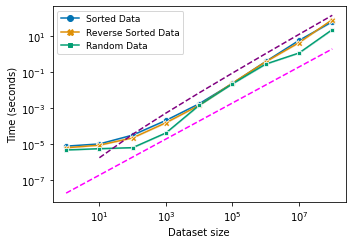

In [55]:
# Plot Categories
sorting_algorithm = {
#     'Insertion Sort': 'insertion_sort',
#     'Bubble Sort': 'bubble_sort',
#     'Merge Sort': 'merge_sort',
#     'Quick Sort': 'quick_sort',
#     'Combined Sort': 'combined_sort',
#     'Python Built-in Sort': 'sorted',
    'NumPy Sort': 'sort'
}
x = [10**0,10**1, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8]
# labels_size = '9'
# title_size = '11'
# legend_size = '7'

for title, sort_func in sorting_algorithm.items():
    df_order_temp = df_all_frames[df_all_frames['Sorting Algorithm'] == title]
    plt.figure(figsize=(5, 3.5))

    # Using Colorblind palette for colors being used in plots
    sns.set_palette(sns.color_palette('colorblind'))
    fig = sns.lineplot(x='input size',
                       y='Time',
                       hue='input order',
                       style='input order',
                       markers=True,
                       dashes=False,
                       data=df_order_temp,ci=0)
#     plt.title(title)

    plt.xlabel('Dataset size')
    plt.ylabel('Time (seconds)')
    plt.legend(loc=2, fontsize = 9)
    plt.grid(False)
    plt.xscale('log')
    plt.yscale('log')

#     plt.loglog(x, [10**-5.6*n**2 for n in x], '--', color='black')
    plt.loglog(x, [10**-7.7*n for n in x], '--', color='magenta')
    plt.loglog(x[1:], [10**-7.1*n*np.log(n) for n in x[1:]], '--', color='purple')
    
    plt.tight_layout()
    fig = fig.get_figure()
    fig.savefig('plots/' + title + '.pdf')
    plt.show()